In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [ ]:
with open('text_files/DATA_3Nov_1_20pm.TXT') as f:
    lines = f.readlines()

In [ ]:
#La toma empieza en 36 (osea el dato 24) y termina en -8
num_samples = len(lines)
num_vars = 11

#lines = lines[0:-1]
data_array = np.zeros((num_vars, len(lines)))
time_list = []

for i in range(len(lines)):
  data = json.loads(lines[i])
  time = data.pop('Timestamp')
  time_list.append(time)
  lista = list(data.items())
  array = np.array(lista)[:, 1]
  data_array[:, i] = array

keys = list(data.keys())

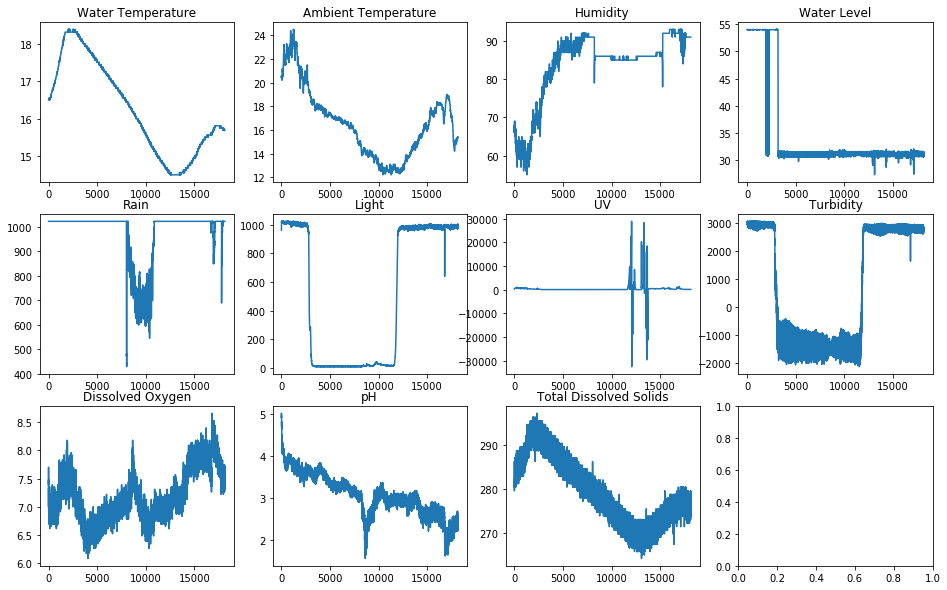

In [ ]:
fig, axs = plt.subplots(3, 4, figsize = (16, 10))
axs = axs.flatten()

for i in range(num_vars):
  axs[i].plot(data_array[i, :], label = keys[i]);
  #axs[i].legend();
  axs[i].set_title(keys[i]);

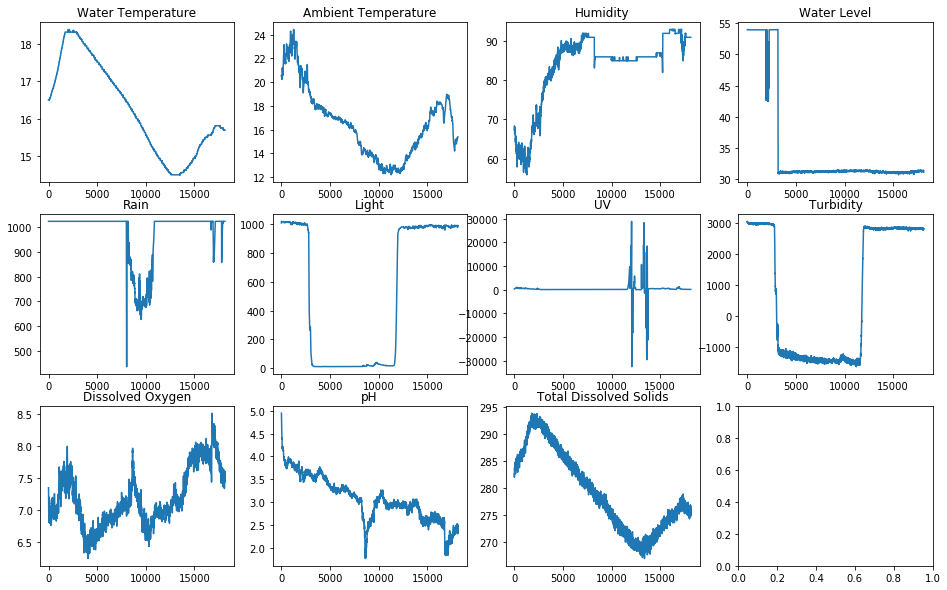

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fig, axs = plt.subplots(3, 4, figsize = (16, 10))
axs = axs.flatten()

for i in range(num_vars):
  axs[i].plot(moving_average(data_array[i, :], 12), label = keys[i]);
  #axs[i].legend();
  axs[i].set_title(keys[i]);

## Date Format

Data starts at `start_time_real`, set to time at which data was started.

In [ ]:
formatted_time_list = []
start_time_real = datetime.strptime("03/11/21 13:20:32", '%d/%m/%y %H:%M:%S')
for i in range(len(time_list)):
    formatted_time_str = "01/10/21 "+time_list[i][3:]
    if i==0:
        start_time_data = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S')
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    else:
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    formatted_time_list.append(formatted_time)

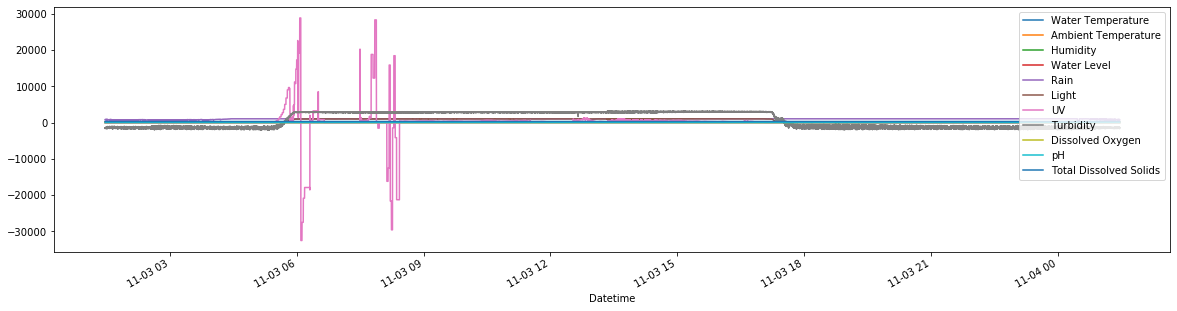

In [ ]:
cols = list(data.keys())
list_data = list(data.items())

df_data = pd.DataFrame(np.transpose(data_array), columns=cols)
df_data['Datetime'] = formatted_time_list
df_data = df_data.set_index('Datetime')
df_data.plot(figsize=(20,5))

In [ ]:
df_data.to_csv('formatted_data_nov03.csv')

In [ ]:
df_data.tail()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids
Datetime,,,,,,,,,,,
2021-11-03 14:32:01,15.69,15.4,91.0,31.58,1023.0,997.0,85.0,2809.16,7.48,2.45,277.13
2021-11-03 14:32:06,15.69,15.4,91.0,30.62,1023.0,985.0,85.0,2819.34,7.48,2.51,273.83
2021-11-03 14:32:11,15.69,15.4,91.0,31.58,1023.0,999.0,85.0,2791.73,7.44,2.53,279.61
2021-11-03 14:32:16,15.69,15.4,91.0,30.61,1023.0,985.0,85.0,2826.02,7.48,2.62,273.83
2021-11-03 14:32:21,15.69,15.4,91.0,31.07,1023.0,997.0,80.0,2819.34,7.61,2.49,277.13


# Date Format and Offset for Datalogger Files

Data starts at `start_time_real`, set to time at which data was started.

In [46]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [47]:
df = pd.read_csv('datalogger_files/datos_datalogger_nov17.csv')
df = df.dropna()
del df['Date']
del df['Time']
df.tail()

,Datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L]
19967,11/18/2021 3:51:32 p. m.,18.13,5.12,122.3,286.8,665,578,1.5,0.332,0.33,0,10.792,70.4,4.83
19968,11/18/2021 3:51:37 p. m.,18.14,5.12,122.4,286.7,665,578,1.5,0.332,0.33,0,10.792,70.5,4.84
19969,11/18/2021 3:51:42 p. m.,18.14,5.12,122.3,286.8,665,578,1.5,0.332,0.33,0,10.793,70.5,4.84
19970,11/18/2021 3:51:47 p. m.,18.15,5.12,122.3,286.7,665,578,1.5,0.332,0.33,0,10.793,71.0,4.87
19971,11/18/2021 3:51:52 p. m.,18.16,5.12,122.3,286.7,665,578,1.5,0.332,0.33,0,10.794,72.0,4.94


### Cambiando el Formato AM-PM

In [48]:
time_list = list(df['Datetime'].copy())
for i in range(len(time_list)):
    time_list[i] = time_list[i].replace("p. m.", "PM") # Preparo los datos poniendo el a. m./p. m. como lo usa datetime
    time_list[i] = time_list[i].replace("a. m.", "AM") # Preparo los datos poniendo el a. m./p. m. como lo usa datetime

In [49]:
time_list[0]

'11/17/2021 12:07:06 PM'

In [50]:
formatted_time_list = []
for i in range(len(time_list)):
  
    formatted_time = datetime.strptime(time_list[i], '%m/%d/%Y %I:%M:%S %p')
    fixed_time = formatted_time - timedelta(seconds=37, minutes=22)
    formatted_time_list.append(fixed_time)

In [51]:
df['datetime'] = formatted_time_list

In [52]:
df.head()

,Datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L],datetime
0,11/17/2021 12:07:06 p. m.,16.33,5.7,90.5,238.3,647,540,1.5,0.324,0.32,0,10.887,65.2,4.70,2021-11-17 11:44:29
1,11/17/2021 12:07:11 p. m.,16.33,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,65.1,4.69,2021-11-17 11:44:34
2,11/17/2021 12:07:16 p. m.,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,64.9,4.67,2021-11-17 11:44:39
3,11/17/2021 12:07:21 p. m.,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.886,64.5,4.64,2021-11-17 11:44:44
4,11/17/2021 12:07:26 p. m.,16.34,5.7,90.5,238.2,647,541,1.5,0.324,0.32,0,10.887,64.1,4.62,2021-11-17 11:44:49


array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

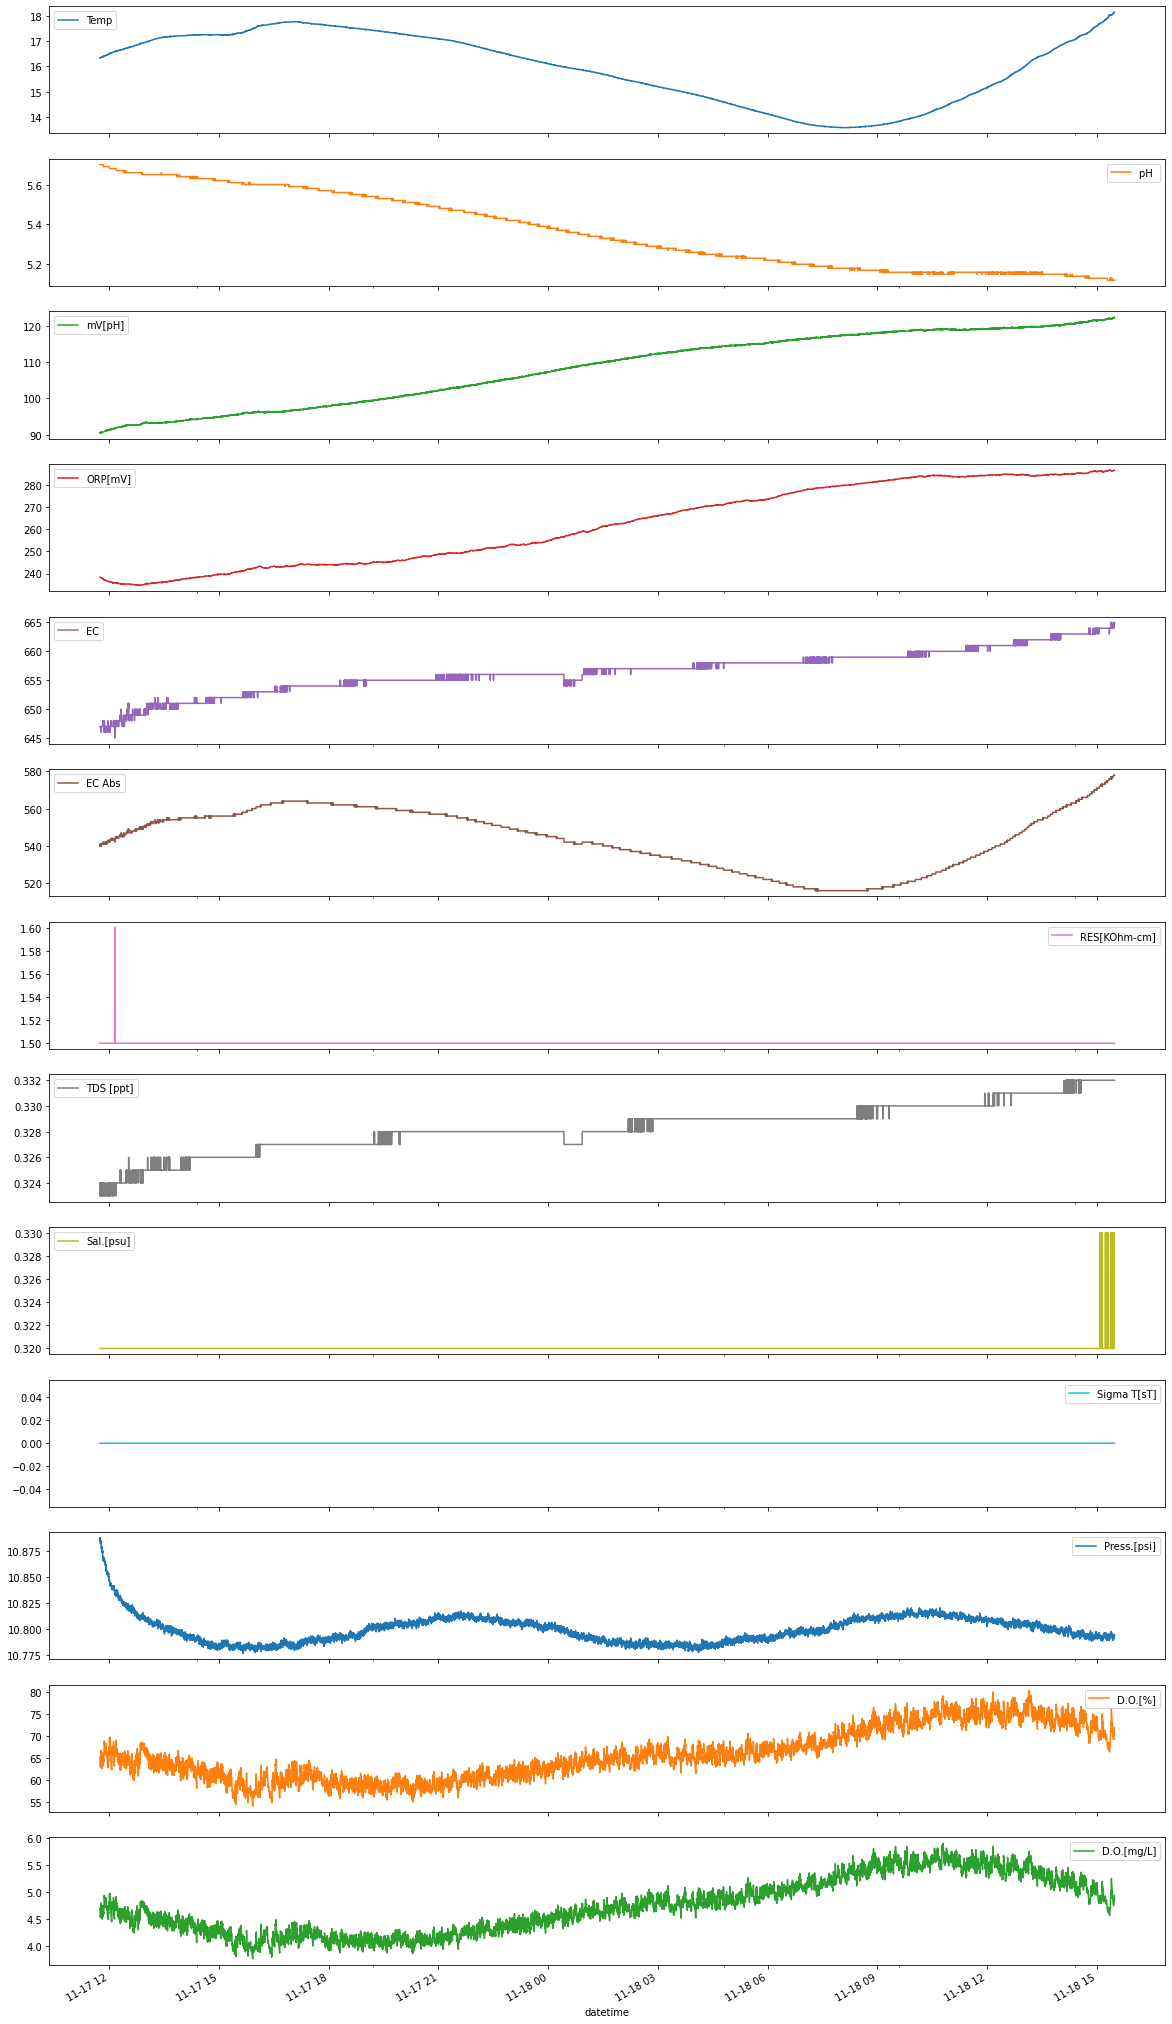

In [53]:
df = df.set_index('datetime')
df.plot(subplots=True, figsize=(20,40))

In [45]:
df.to_csv('datalogger_formatted_data_nov17.csv', index=True)

## Date Format and Offset for Datalogger Files

Data starts at `start_time_real`, set to time at which data was started.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [2]:
df = pd.read_csv('datalogger_files/datos_datalogger_nov22.csv')
del df['Unnamed: 16']
df = df.dropna()
del df['Date']
del df['Time']
df.tail()

,Datetime,Temp,pH,mV[pH],ORP[mV],EC uS/cm,EC Abs uS/cm,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L]
19956,11/23/2021 3:59:44 p. m.,15.12,5.36,108.4,286.3,581.0,472.0,1.7,0.291,0.28,0.0,10.776,36.6,2.68
19957,11/23/2021 3:59:49 p. m.,15.12,5.36,108.5,286.3,581.0,472.0,1.7,0.291,0.28,0.0,10.777,36.5,2.67
19958,11/23/2021 3:59:54 p. m.,15.12,5.36,108.5,286.3,581.0,472.0,1.7,0.291,0.28,0.0,10.777,36.4,2.66
19959,11/23/2021 3:59:59 p. m.,15.12,5.36,108.5,286.3,581.0,472.0,1.7,0.291,0.28,0.0,10.776,36.2,2.65
19960,11/23/2021 4:00:04 p. m.,15.12,5.36,108.5,286.3,581.0,472.0,1.7,0.291,0.28,0.0,10.777,36.1,2.64


### Cambiando el Formato AM-PM

In [3]:
time_list = list(df['Datetime'].copy())
for i in range(len(time_list)):
    time_list[i] = time_list[i].replace("p. m.", "PM") # Preparo los datos poniendo el a. m./p. m. como lo usa datetime
    time_list[i] = time_list[i].replace("a. m.", "AM") # Preparo los datos poniendo el a. m./p. m. como lo usa datetime

In [4]:
time_list[0]

'11/22/2021 12:16:44 PM'

In [5]:
formatted_time_list = []
start_time_real = datetime.strptime("03/11/21 13:20:32", '%d/%m/%y %H:%M:%S')
for i in range(len(time_list)):
  
    formatted_time = datetime.strptime(time_list[i], '%m/%d/%Y %I:%M:%S %p')
    fixed_time = formatted_time - timedelta(seconds=37, minutes=22)
    formatted_time_list.append(fixed_time)

In [6]:
df['datetime'] = formatted_time_list

In [7]:
df.head()

,Datetime,Temp,pH,mV[pH],ORP[mV],EC uS/cm,EC Abs uS/cm,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L],datetime
0,11/22/2021 12:16:44 p. m.,14.18,4.85,135.3,308.3,697.0,554.0,1.4,0.348,0.34,0.0,10.803,55.1,4.12,2021-11-22 11:54:07
1,11/22/2021 12:16:49 p. m.,14.18,4.85,135.3,308.3,696.0,553.0,1.4,0.348,0.34,0.0,10.801,55.2,4.13,2021-11-22 11:54:12
2,11/22/2021 12:16:54 p. m.,14.18,4.85,135.3,308.4,696.0,553.0,1.4,0.348,0.34,0.0,10.801,55.2,4.13,2021-11-22 11:54:17
3,11/22/2021 12:16:59 p. m.,14.18,4.85,135.3,308.4,696.0,553.0,1.4,0.348,0.34,0.0,10.800,55.1,4.12,2021-11-22 11:54:22
4,11/22/2021 12:17:04 p. m.,14.18,4.85,135.3,308.4,696.0,553.0,1.4,0.348,0.34,0.0,10.803,55.0,4.12,2021-11-22 11:54:27


**Abajo se nota un pico, es cuando agregan más agua al tanque (23/Nov, 11:09am)**

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

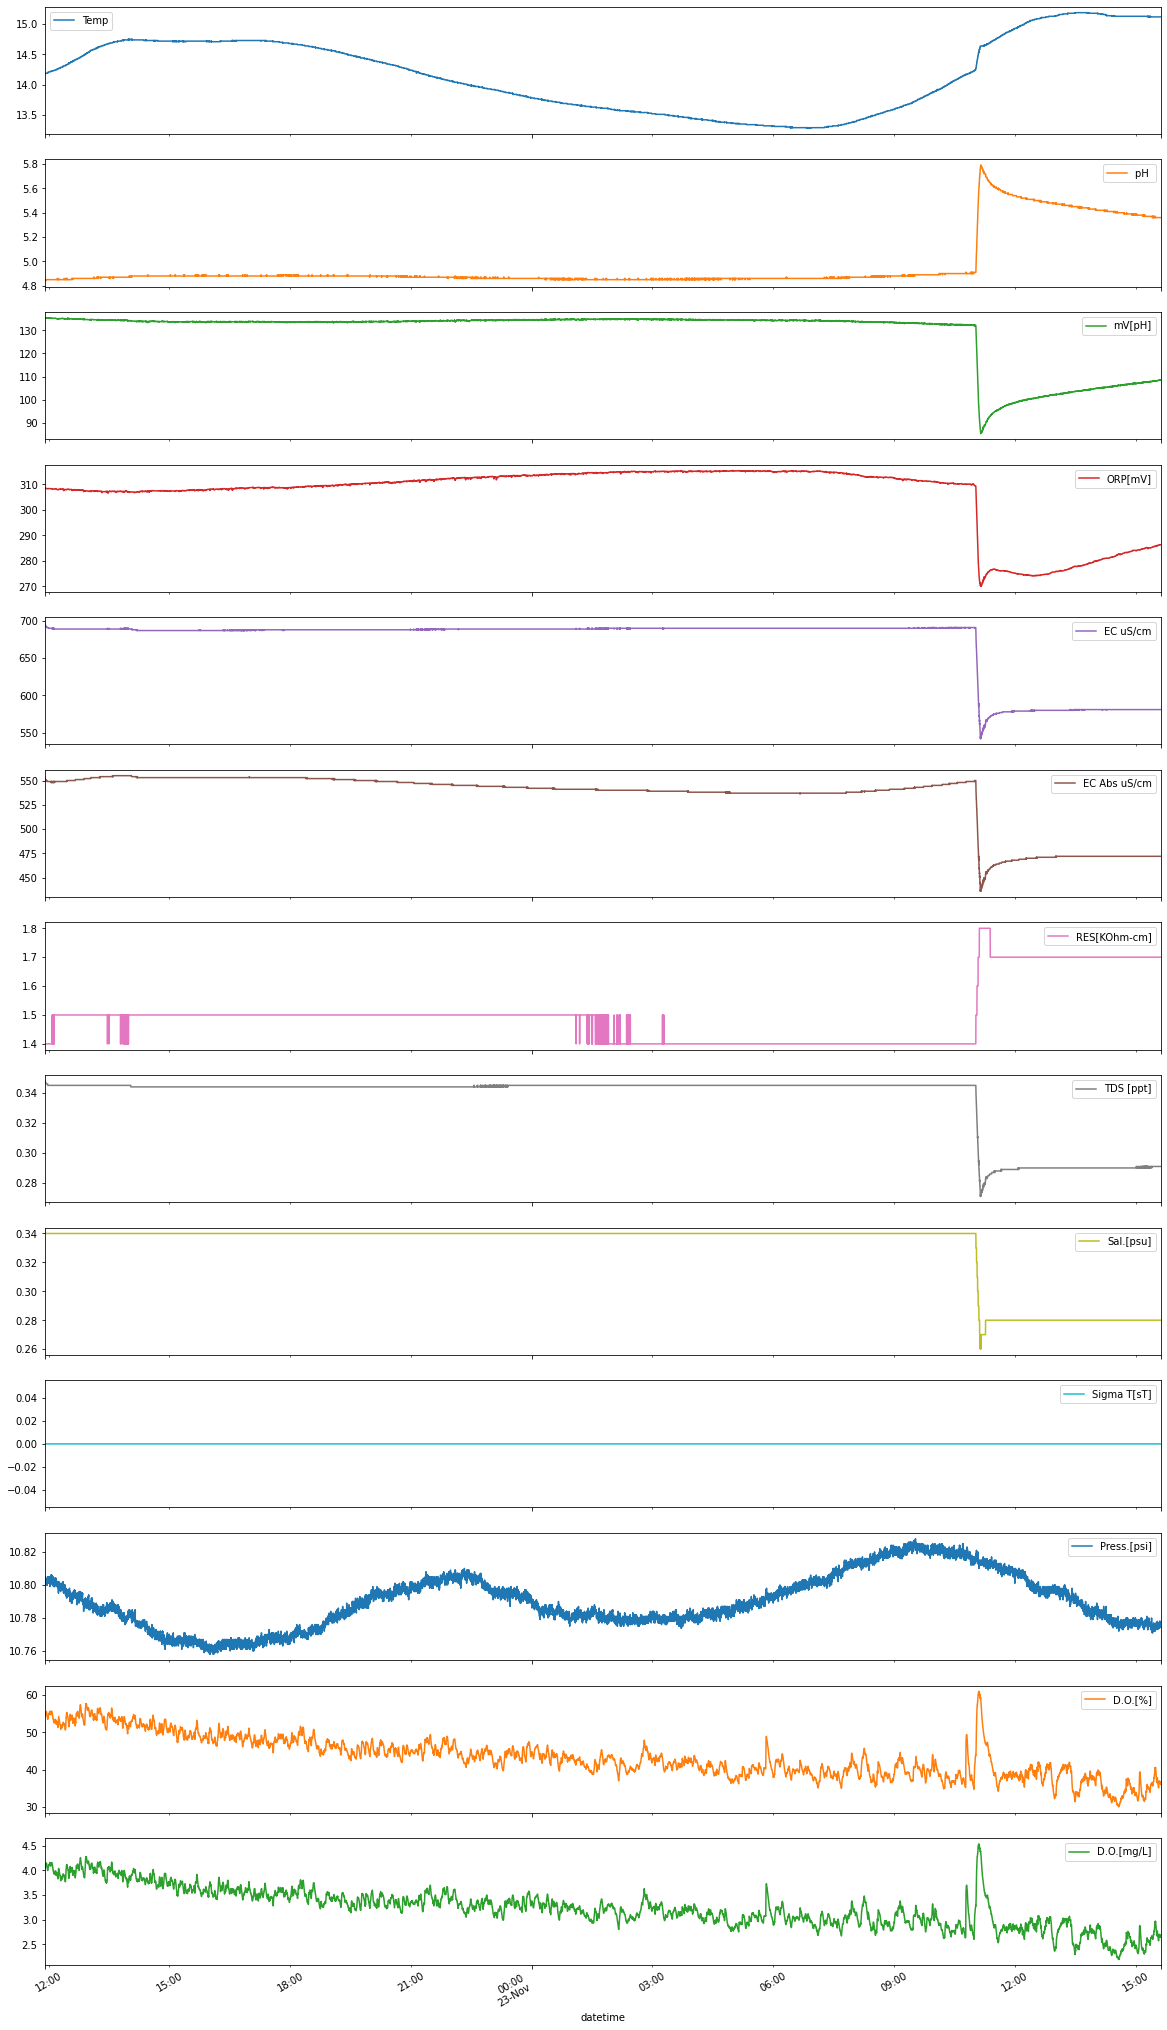

In [8]:
df = df.set_index('datetime')
df.plot(subplots=True, figsize=(20,40))

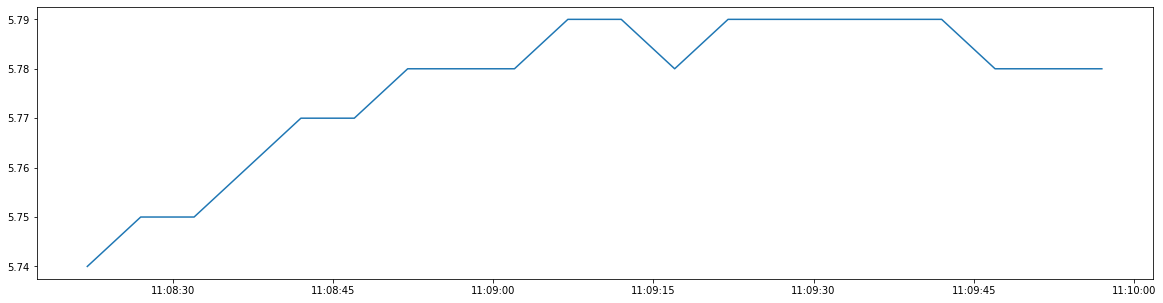

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df.index[-3230:-3210], df['pH '][-3230:-3210])

In [10]:
df['pH '][-3230:-3210]

datetime
2021-11-23 11:08:22    5.74
2021-11-23 11:08:27    5.75
2021-11-23 11:08:32    5.75
2021-11-23 11:08:37    5.76
2021-11-23 11:08:42    5.77
2021-11-23 11:08:47    5.77
2021-11-23 11:08:52    5.78
2021-11-23 11:08:57    5.78
2021-11-23 11:09:02    5.78
2021-11-23 11:09:07    5.79
2021-11-23 11:09:12    5.79
2021-11-23 11:09:17    5.78
2021-11-23 11:09:22    5.79
2021-11-23 11:09:27    5.79
2021-11-23 11:09:32    5.79
2021-11-23 11:09:37    5.79
2021-11-23 11:09:42    5.79
2021-11-23 11:09:47    5.78
2021-11-23 11:09:52    5.78
2021-11-23 11:09:57    5.78
Name: pH , dtype: float64

In [37]:
df.to_csv('datalogger_formatted_data_nov22.csv', index=True)